In [1]:
### Importing relevant libraries

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
### # load data into a pandas dataframe

df = pd.read_csv("Crimes_-_2001_to_Present.csv")

In [3]:
### RENAMING THE COLUMN PRIMARY TYPE TO PRIMATY_TYPE COLUMN TO NOT GET SYNTAX ERROR 
df.rename(columns={'Primary Type':'Primary_type'}, inplace=True)


In [4]:
### seeing how the data is 

df.head()

ID Case Number                    Date                  Block  IUCR  \
0  11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE  0810   
1  11645836    JC212333  05/01/2016 12:25:00 AM    055XX S ROCKWELL ST  1153   
2  11243268    JB167760  01/01/2017 12:01:00 AM       047XX N CLARK ST  1562   
3   1896258     G749215  12/15/2001 02:00:00 AM       011XX N STATE ST  0460   
4  11645527    JC212744  02/02/2015 10:00:00 AM     069XX W ARCHER AVE  1153   

         Primary_type                          Description  \
0               THEFT                            OVER $500   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2         SEX OFFENSE            AGG CRIMINAL SEXUAL ABUSE   
3             BATTERY                               SIMPLE   
4  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False      True  ...   8.0            44.0        06   
1                  NaN   False     False  ...  15.0            63.0        11   
2            APARTMENT   False     False  ...  47.0             3.0        17   
3               STREET   False     False  ...   NaN             NaN       08B   
4                OTHER   False     False  ...  23.0            56.0        11   

   X Coordinate Y Coordinate  Year              Updated On  Latitude  \
0           NaN          NaN  2018  04/06/2019 04:04:43 PM       NaN   
1           NaN          NaN  2016  04/06/2019 04:04:43 PM       NaN   
2           NaN          NaN  2017  09/13/2018 03:56:52 PM       NaN   
3           NaN          NaN  2001  08/17/2015 03:03:40 PM       NaN   
4           NaN          NaN  2015  04/06/2019 04:04:43 PM       NaN   

  Longitude  Location  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  

[5 rows x 22 columns]

In [5]:
### Checking for the null values in the columns
df.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary_type                 0
Description                  0
Location Description     10834
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Community Area          613475
FBI Code                     0
X Coordinate             88300
Y Coordinate             88300
Year                         0
Updated On                   0
Latitude                 88300
Longitude                88300
Location                 88300
dtype: int64

In [6]:
### checking for the highest commited crime
df["Primary_type"].value_counts()

THEFT                                1658116
BATTERY                              1435731
CRIMINAL DAMAGE                       895904
NARCOTICS                             748930
ASSAULT                               513778
OTHER OFFENSE                         487894
BURGLARY                              426407
MOTOR VEHICLE THEFT                   383562
DECEPTIVE PRACTICE                    349927
ROBBERY                               295081
CRIMINAL TRESPASS                     215554
WEAPONS VIOLATION                     109027
PROSTITUTION                           69897
OFFENSE INVOLVING CHILDREN             56309
PUBLIC PEACE VIOLATION                 52567
SEX OFFENSE                            31088
CRIM SEXUAL ASSAULT                    27601
INTERFERENCE WITH PUBLIC OFFICER       18531
LIQUOR LAW VIOLATION                   14957
GAMBLING                               14622
ARSON                                  13406
HOMICIDE                               12755
KIDNAPPING

In [7]:
### Checking for the location where most crimes occur
df["Location Description"].value_counts()

STREET                   2048875
RESIDENCE                1314861
APARTMENT                 893151
SIDEWALK                  732746
OTHER                     270015
                          ...   
CLEANERS/LAUNDROMAT            1
POOLROOM                       1
FUNERAL PARLOR                 1
EXPRESSWAY EMBANKMENT          1
LOADING DOCK                   1
Name: Location Description, Length: 217, dtype: int64

In [8]:
### Total number of crimes
df["Primary_type"].value_counts().sum()

7858475

In [9]:
### Grouping up by the type of crime
crimetype=df.groupby(['Primary_type'])

In [10]:
df['Primary_type']

0                               THEFT
1                  DECEPTIVE PRACTICE
2                         SEX OFFENSE
3                             BATTERY
4                  DECEPTIVE PRACTICE
                      ...            
7858470               CRIMINAL DAMAGE
7858471    OFFENSE INVOLVING CHILDREN
7858472                         THEFT
7858473            DECEPTIVE PRACTICE
7858474                       BATTERY
Name: Primary_type, Length: 7858475, dtype: object

In [11]:
### Finding the most common locations for the the top 10 most common crimes
crimetype['Location Description'].value_counts().nlargest(10)

Primary_type         Location Description
THEFT                STREET                  448970
CRIMINAL DAMAGE      STREET                  322718
BATTERY              APARTMENT               303394
MOTOR VEHICLE THEFT  STREET                  299681
BATTERY              RESIDENCE               295628
NARCOTICS            STREET                  265850
BATTERY              STREET                  247705
NARCOTICS            SIDEWALK                233074
OTHER OFFENSE        RESIDENCE               215170
BATTERY              SIDEWALK                203909
Name: Location Description, dtype: int64

In [12]:
### FINDING THE TOP 10 OF EACH COLUMNS
for col in df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts().head(10))

----------------------------------------ID---------------------------------------- - 

11646166    1
5733669     1
5733689     1
5733687     1
5733686     1
5733685     1
5733683     1
5733681     1
5733679     1
5733676     1
Name: ID, dtype: int64

----------------------------------------Case Number---------------------------------------- - 

HZ140230    6
HJ590004    6
JC470284    5
HS256531    5
HP296582    5
JE266473    5
HJ104730    4
HZ403466    4
HY346207    4
HN217726    4
Name: Case Number, dtype: int64

----------------------------------------Date---------------------------------------- - 

01/01/2008 12:01:00 AM    304
01/01/2007 12:01:00 AM    259
01/01/2006 12:01:00 AM    226
01/01/2004 12:00:00 AM    218
01/01/2005 12:01:00 AM    215
01/01/2003 12:01:00 AM    213
01/01/2003 12:00:00 AM    210
01/01/2007 12:00:00 AM    205
01/01/2009 12:01:00 AM    198
01/01/2015 12:01:00 AM    198
Name: Date, dtype: int64

----------------------------------------Block---------------------------------------- - 

100XX W OHARE ST                       16548
001XX N STATE ST                       15481
076XX S CICERO AVE                     10145
008XX N MICHIGAN AVE                    9447
0000X N STATE ST                        9132
0000X W TERMINAL ST                     6724
064XX S DR MARTIN LUTHER KING JR DR     6026
063XX S DR MARTIN LUTHER KING JR DR     5646
023XX S STATE ST                        5255
001XX W 87TH ST                         4651
Name: Block, dtype: int64

----------------------------------------IUCR---------------------------------------- - 

0820    636203
0486    614359
0460    566271
1320    422646
0810    420827
1310    413718
0560    351768
0910    302867
0610    285359
1811    279143
Name: IUCR, dtype: int64

----------------------------------------Primary_type---------------------------------------- - 

THEFT                  1658116
BATTERY                1435731
CRIMINAL DAMAGE         895904
NARCOTICS               748930
ASSAULT                 513778
OTHER OFFENSE           487894
BURGLARY                426407
MOTOR VEHICLE THEFT     383562
DECEPTIVE PRACTICE      349927
ROBBERY                 295081
Name: Primary_type, dtype: int64

----------------------------------------Description---------------------------------------- - 

SIMPLE                          921967
$500 AND UNDER                  636188
DOMESTIC BATTERY SIMPLE         614359
TO VEHICLE                      437725
OVER $500                       420814
TO PROPERTY                     413718
AUTOMOBILE                      302867
FORCIBLE ENTRY                  285359
POSS: CANNABIS 30GMS OR LESS    278139
FROM BUILDING                   256130
Name: Description, dtype: int64

----------------------------------------Location Description---------------------------------------- - 

STREET                            2048875
RESIDENCE                         1314861
APARTMENT                          893151
SIDEWALK                           732746
OTHER                              270015
PARKING LOT/GARAGE(NON.RESID.)     202985
ALLEY                              174658
SMALL RETAIL STORE                 149150
SCHOOL, PUBLIC, BUILDING           146386
RESIDENCE-GARAGE                   135543
Name: Location Description, dtype: int64

----------------------------------------Arrest---------------------------------------- - 

False    5814932
True     2043543
Name: Arrest, dtype: int64

----------------------------------------Domestic---------------------------------------- - 

False    6769134
True     1089341
Name: Domestic, dtype: int64

----------------------------------------Beat---------------------------------------- - 

421     61244
423     60646
1834    56385
624     55268
511     53883
1533    52969
1112    52789
823     51998
414     49425
1522    48804
Name: Beat, dtype: int64

----------------------------------------District---------------------------------------- - 

8.0     527829
11.0    503946
6.0     459623
7.0     453564
25.0    446784
4.0     446245
3.0     398535
12.0    389948
9.0     383697
2.0     372407
Name: District, dtype: int64

----------------------------------------Ward---------------------------------------- - 

28.0    332254
42.0    300782
24.0    284429
27.0    273103
2.0     256127
6.0     240012
17.0    239574
20.0    237713
3.0     220635
21.0    219462
Name: Ward, dtype: int64

----------------------------------------Community Area---------------------------------------- - 

25.0    452016
8.0     255820
43.0    238971
23.0    225873
28.0    219835
24.0    212449
29.0    212037
67.0    206490
71.0    205110
49.0    192289
Name: Community Area, dtype: int64

----------------------------------------FBI Code---------------------------------------- - 

06     1658116
08B    1222123
14      895904
26      765799
18      705479
05      426407
08A     395353
07      383562
11      300865
03      295081
Name: FBI Code, dtype: int64

----------------------------------------X Coordinate---------------------------------------- - 

1100658.0    14332
1145727.0    10370
1176352.0     9612
1177338.0     7265
1176436.0     4853
1176963.0     3788
1176365.0     3672
1145011.0     3516
1176223.0     3397
1149512.0     3368
Name: X Coordinate, dtype: int64

----------------------------------------Y Coordinate---------------------------------------- - 

1934241.0    14348
1853720.0    10458
1900927.0     8529
1906181.0     5040
1910225.0     3867
1905805.0     3417
1866253.0     3335
1950346.0     3186
1950347.0     3090
1901446.0     3069
Name: Y Coordinate, dtype: int64

----------------------------------------Year---------------------------------------- - 

2002    486807
2001    485886
2003    475984
2004    469421
2005    453772
2006    448179
2007    437087
2008    427169
2009    392826
2010    370506
Name: Year, dtype: int64

----------------------------------------Updated On---------------------------------------- - 

02/10/2018 03:50:01 PM    2787864
02/28/2018 03:56:25 PM    2764995
08/17/2015 03:03:40 PM     527571
02/04/2016 06:33:39 AM     349161
01/03/2023 03:46:28 PM     228109
08/05/2023 04:45:54 PM     144074
05/04/2018 03:51:04 PM      84251
12/17/2020 03:44:58 PM      31105
06/30/2019 03:56:27 PM      25038
02/14/2017 03:49:42 PM      18121
Name: Updated On, dtype: int64

----------------------------------------Latitude---------------------------------------- - 

41.976290    14332
41.754593    10335
41.883500     8505
41.897895     4878
41.909664     3507
41.896889     3383
41.788987     3242
41.885488     2913
41.868181     2808
41.882334     2728
Name: Latitude, dtype: int64

----------------------------------------Longitude---------------------------------------- - 

-87.905227    14332
-87.741529    10335
-87.627877     8505
-87.624097     4883
-87.742729     3507
-87.628203     3383
-87.741480     3242
-87.726422     2913
-87.709271     2808
-87.627842     2728
Name: Longitude, dtype: int64

----------------------------------------Location---------------------------------------- - 

(41.976290414, -87.905227221)    14332
(41.754592961, -87.741528537)    10335
(41.883500187, -87.627876698)     8505
(41.897895128, -87.624096605)     4878
(41.909664252, -87.742728815)     3507
(41.896888586, -87.628203192)     3383
(41.788987036, -87.74147999)      3242
(41.885487535, -87.726422045)     2913
(41.868180939, -87.709271389)     2808
(41.88233367, -87.627841791)      2728
Name: Location, dtype: int64

In [13]:
# The top 3 blocks where the most crimes occur are 
# 1)100XX W OHARE ST
# 2)001XX N STATE ST
# 3)076XX S CICERO ST

In [14]:
### USING A LAMBDA FUNCTION TO FIND THE NUMBER OF CRIMES WHICH HAPPEN IN THE RESIDENCE LOCATION
crimetype['Location Description'].apply(lambda x: x.str.contains('RESIDENCE').sum())

Primary_type
ARSON                                  4184
ASSAULT                              108094
BATTERY                              332939
BURGLARY                             217465
CONCEALED CARRY LICENSE VIOLATION         8
CRIM SEXUAL ASSAULT                    9770
CRIMINAL DAMAGE                      218092
CRIMINAL SEXUAL ASSAULT                1933
CRIMINAL TRESPASS                     44069
DECEPTIVE PRACTICE                   103487
DOMESTIC VIOLENCE                         0
GAMBLING                                668
HOMICIDE                                  3
HUMAN TRAFFICKING                        42
INTERFERENCE WITH PUBLIC OFFICER        767
INTIMIDATION                           1524
KIDNAPPING                             1851
LIQUOR LAW VIOLATION                    368
MOTOR VEHICLE THEFT                    7974
NARCOTICS                             39572
NON - CRIMINAL                           15
NON-CRIMINAL                             36
NON-CRIMINAL (SUBJE

In [15]:
crime_type = df['Primary_type'].value_counts()

In [16]:
### USING THE LAMBDA FUNCTION AGAIN TO FIND THE CRIMES WHICH HAPPEN IN TOP 4 MOST AFFECTED LOCATIONS

crime_in_residence1 = crimetype['Location Description'].apply(lambda x: x.str.contains('RESIDENCE').sum())

In [17]:
crime_in_street = crimetype['Location Description'].apply(lambda x: x.str.contains('STREET').sum())

In [18]:
crime_in_apartment = crimetype['Location Description'].apply(lambda x: x.str.contains('APARTMENT').sum())

In [19]:
crime_in_sidewalk = crimetype['Location Description'].apply(lambda x: x.str.contains('SIDEWALK').sum())

In [20]:
### USING CONCAT TO CONCATENATE THE GROUPS crime_type and crime_in_residence1 to give the number of respective crimes which happen in residence

df2 = pd.concat([crime_type,crime_in_residence1,crime_in_street,crime_in_apartment,crime_in_sidewalk], axis='columns', sort=False)

In [21]:
df2
### this basically gives that the how many of the crimes happened in respective locations (the top 4 locations)


Primary_type  Location Description  \
THEFT                                   1658116                221542   
BATTERY                                 1435731                332939   
CRIMINAL DAMAGE                          895904                218092   
NARCOTICS                                748930                 39572   
ASSAULT                                  513778                108094   
OTHER OFFENSE                            487894                219552   
BURGLARY                                 426407                217465   
MOTOR VEHICLE THEFT                      383562                  7974   
DECEPTIVE PRACTICE                       349927                103487   
ROBBERY                                  295081                 12885   
CRIMINAL TRESPASS                        215554                 44069   
WEAPONS VIOLATION                        109027                 12033   
PROSTITUTION                              69897                   649   
OFFENSE INVOLVING CHILDREN                56309                 30486   
PUBLIC PEACE VIOLATION                    52567                  5913   
SEX OFFENSE                               31088                  8632   
CRIM SEXUAL ASSAULT                       27601                  9770   
INTERFERENCE WITH PUBLIC OFFICER          18531                   767   
LIQUOR LAW VIOLATION                      14957                   368   
GAMBLING                                  14622                   668   
ARSON                                     13406                  4184   
HOMICIDE                                  12755                     3   
KIDNAPPING                                 7266                  1851   
CRIMINAL SEXUAL ASSAULT                    7220                  1933   
STALKING                                   4936                  1436   
INTIMIDATION                               4745                  1524   
CONCEALED CARRY LICENSE VIOLATION          1131                     8   
OBSCENITY                                   832                   374   
PUBLIC INDECENCY                            196                     3   
NON-CRIMINAL                                183                    36   
OTHER NARCOTIC VIOLATION                    149                     7   
HUMAN TRAFFICKING                           101                    42   
NON - CRIMINAL                               38                    15   
RITUALISM                                    24                     5   
NON-CRIMINAL (SUBJECT SPECIFIED)              9                     2   
DOMESTIC VIOLENCE                             1                     0   

                                   Location Description  Location Description  \
THEFT                                            448970                 98323   
BATTERY                                          247705                317699   
CRIMINAL DAMAGE                                  322718                106115   
NARCOTICS                                        265850                 16247   
ASSAULT                                          104962                 75233   
OTHER OFFENSE                                     83368                 83877   
BURGLARY                                           1277                126089   
MOTOR VEHICLE THEFT                              299681                  1622   
DECEPTIVE PRACTICE                                22323                 37252   
ROBBERY                                           92542                  5925   
CRIMINAL TRESPASS                                 11070                 21475   
WEAPONS VIOLATION                                 41818                  5730   
PROSTITUTION                                      58032                   123   
OFFENSE INVOLVING CHILDREN                         2463                 14483   
PUBLIC PEACE VIOLATION                            15831                  2412   
SEX OFFENSE                          

In [22]:
# We have a problem and we need to update this column: The DF has duplicated names
# Checking once again which all columns have the same name
[item for item, count in collections.Counter(df2.columns).items() if count > 1]


['Location Description']

In [23]:
#Checking the Index position of duplicate name of columns:
[idx for idx, item in enumerate(df2.columns) if item in df2.columns[:idx]]

[2, 3, 4]

In [24]:
# Changing the name of duplicate columns names
df2.columns.values[0] ='Total_Crime'
df2.columns.values[1] ='crime_in_residence'
df2.columns.values[2] ='crime_in_street'
df2.columns.values[3] ='crime_in_apartment'
df2.columns.values[4] ='crime_in_sidewalk'

In [25]:
### Checking the df2 dataframe after renaming the the columns
df2

Total_Crime  crime_in_residence  \
THEFT                                  1658116              221542   
BATTERY                                1435731              332939   
CRIMINAL DAMAGE                         895904              218092   
NARCOTICS                               748930               39572   
ASSAULT                                 513778              108094   
OTHER OFFENSE                           487894              219552   
BURGLARY                                426407              217465   
MOTOR VEHICLE THEFT                     383562                7974   
DECEPTIVE PRACTICE                      349927              103487   
ROBBERY                                 295081               12885   
CRIMINAL TRESPASS                       215554               44069   
WEAPONS VIOLATION                       109027               12033   
PROSTITUTION                             69897                 649   
OFFENSE INVOLVING CHILDREN               56309               30486   
PUBLIC PEACE VIOLATION                   52567                5913   
SEX OFFENSE                              31088                8632   
CRIM SEXUAL ASSAULT                      27601                9770   
INTERFERENCE WITH PUBLIC OFFICER         18531                 767   
LIQUOR LAW VIOLATION                     14957                 368   
GAMBLING                                 14622                 668   
ARSON                                    13406                4184   
HOMICIDE                                 12755                   3   
KIDNAPPING                                7266                1851   
CRIMINAL SEXUAL ASSAULT                   7220                1933   
STALKING                                  4936                1436   
INTIMIDATION                              4745                1524   
CONCEALED CARRY LICENSE VIOLATION         1131                   8   
OBSCENITY                                  832                 374   
PUBLIC INDECENCY                           196                   3   
NON-CRIMINAL                               183                  36   
OTHER NARCOTIC VIOLATION                   149                   7   
HUMAN TRAFFICKING                          101                  42   
NON - CRIMINAL                              38                  15   
RITUALISM                                   24                   5   
NON-CRIMINAL (SUBJECT SPECIFIED)             9                   2   
DOMESTIC VIOLENCE                            1                   0   

                                   crime_in_street  crime_in_apartment  \
THEFT                                       448970               98323   
BATTERY                                     247705              317699   
CRIMINAL DAMAGE                             322718              106115   
NARCOTICS                                   265850               16247   
ASSAULT                                     104962               75233   
OTHER OFFENSE                                83368               83877   
BURGLARY                                      1277              126089   
MOTOR VEHICLE THEFT                         299681                1622   
DECEPTIVE PRACTICE                           22323               37252   
ROBBERY                                      92542                5925   
CRIMINAL TRESPASS                            11070               21475   
WEAPONS VIOLATION                            41818                5730   
PROSTITUTION                                 58032                 123   
OFFENSE INVOLVING CHILDREN                    2463               14483   
PUBLIC PEACE VIOLATION                       15831                2412   
SEX OFFENSE                                   3048                4851   
CRIM SEXUAL ASSAULT                           1297                7206   
INTERFERENCE WITH PUBLIC OFFICER              9152                 372   
LIQUOR LAW VIOLATION                  

In [26]:
### RENAMING THE NAMES OF THE COLUMNS (first attempt to renaming the columns)

### df2.rename(columns={'Primary Type':'totalcrime', 'Location Description':'crime_in_residence'}, inplace=True)
### this does not work cause it changes all the duplicate names by the last name we tried to change  

In [27]:
### FINDING THE PERCENTAGE OF THE CRIMES WHICH HAPPEN IN THE LOCATIONS AND ASSIGNING IT TO A NEW COLUMN
df2['percentage_in_residence'] = (df2['crime_in_residence']/df2['Total_Crime']) * 100
df2['percentage_in_street'] = (df2['crime_in_street']/df2['Total_Crime']) * 100
df2['percentage_in_apartment'] = (df2['crime_in_apartment']/df2['Total_Crime']) * 100
df2['percentage_in_sidewalk'] = (df2['crime_in_sidewalk']/df2['Total_Crime']) * 100


In [ ]:
df2

In [28]:
### checking the columns in df2 to re order them and place the percentage columns in easier to understand positions
df2.columns

Index(['Total_Crime', 'crime_in_residence', 'crime_in_street',
       'crime_in_apartment', 'crime_in_sidewalk', 'percentage_in_residence',
       'percentage_in_street', 'percentage_in_apartment',
       'percentage_in_sidewalk'],
      dtype='object')

In [29]:
order = ['Total_Crime', 'crime_in_residence','percentage_in_residence', 'crime_in_street','percentage_in_street',
       'crime_in_apartment','percentage_in_apartment', 'crime_in_sidewalk','percentage_in_sidewalk']
df2 = df2[order]


In [30]:
### We have the number of crimes occured in the location and with the percentage next to it
df2


Total_Crime  crime_in_residence  \
THEFT                                  1658116              221542   
BATTERY                                1435731              332939   
CRIMINAL DAMAGE                         895904              218092   
NARCOTICS                               748930               39572   
ASSAULT                                 513778              108094   
OTHER OFFENSE                           487894              219552   
BURGLARY                                426407              217465   
MOTOR VEHICLE THEFT                     383562                7974   
DECEPTIVE PRACTICE                      349927              103487   
ROBBERY                                 295081               12885   
CRIMINAL TRESPASS                       215554               44069   
WEAPONS VIOLATION                       109027               12033   
PROSTITUTION                             69897                 649   
OFFENSE INVOLVING CHILDREN               56309               30486   
PUBLIC PEACE VIOLATION                   52567                5913   
SEX OFFENSE                              31088                8632   
CRIM SEXUAL ASSAULT                      27601                9770   
INTERFERENCE WITH PUBLIC OFFICER         18531                 767   
LIQUOR LAW VIOLATION                     14957                 368   
GAMBLING                                 14622                 668   
ARSON                                    13406                4184   
HOMICIDE                                 12755                   3   
KIDNAPPING                                7266                1851   
CRIMINAL SEXUAL ASSAULT                   7220                1933   
STALKING                                  4936                1436   
INTIMIDATION                              4745                1524   
CONCEALED CARRY LICENSE VIOLATION         1131                   8   
OBSCENITY                                  832                 374   
PUBLIC INDECENCY                           196                   3   
NON-CRIMINAL                               183                  36   
OTHER NARCOTIC VIOLATION                   149                   7   
HUMAN TRAFFICKING                          101                  42   
NON - CRIMINAL                              38                  15   
RITUALISM                                   24                   5   
NON-CRIMINAL (SUBJECT SPECIFIED)             9                   2   
DOMESTIC VIOLENCE                            1                   0   

                                   percentage_in_residence  crime_in_street  \
THEFT                                            13.361068           448970   
BATTERY                                          23.189511           247705   
CRIMINAL DAMAGE                                  24.343233           322718   
NARCOTICS                                         5.283805           265850   
ASSAULT                                          21.039048           104962   
OTHER OFFENSE                                    44.999939            83368   
BURGLARY                                         50.999397             1277   
MOTOR VEHICLE THEFT                               2.078934           299681   
DECEPTIVE PRACTICE                               29.573883            22323   
ROBBERY                                           4.366598            92542   
CRIMINAL TRESPASS                                20.444529            11070   
WEAPONS VIOLATION                                11.036716            41818   
PROSTITUTION                                      0.928509            58032   
OFFENSE INVOLVING CHILDREN                       54.140546             2463   
PUBLIC PEACE VIOLATION                           11.248502            15831   
SEX OFFENSE                                      27.766341             3048   
CRIM SEXUAL ASSAULT                              35.397268             1297   
INTERFERENCE WITH PUBL

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
### CHECKING THE DATATYPE OF THE COLUMN Date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858475 entries, 0 to 7858474
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary_type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [33]:
df['Time'] = pd.to_datetime(df['Date'], format ='%I%M%p').dt.strftime('%H:%M:%S')

In [34]:
### GETTING THE DAY OF WHEN THE CRIME OCCURED WITH dt.day_name
df['DAYOFWEEK'] = df['Date'].dt.day_name()

In [35]:
###### GETTING THE MONTH OF WHEN THE CRIME OCCURED WITH dt.month_name
df['MONTH'] = df['Date'].dt.month_name()

In [36]:
### Checking if the Time,DAYOFWEEK,MONTH columns have been made as desired 
df.head(5)

ID Case Number                Date                  Block  IUCR  \
0  11646166    JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE  0810   
1  11645836    JC212333 2016-05-01 00:25:00    055XX S ROCKWELL ST  1153   
2  11243268    JB167760 2017-01-01 00:01:00       047XX N CLARK ST  1562   
3   1896258     G749215 2001-12-15 02:00:00       011XX N STATE ST  0460   
4  11645527    JC212744 2015-02-02 10:00:00     069XX W ARCHER AVE  1153   

         Primary_type                          Description  \
0               THEFT                            OVER $500   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2         SEX OFFENSE            AGG CRIMINAL SEXUAL ABUSE   
3             BATTERY                               SIMPLE   
4  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  X Coordinate  Y Coordinate  \
0            RESIDENCE   False      True  ...           NaN           NaN   
1                  NaN   False     False  ...           NaN           NaN   
2            APARTMENT   False     False  ...           NaN           NaN   
3               STREET   False     False  ...           NaN           NaN   
4                OTHER   False     False  ...           NaN           NaN   

   Year              Updated On Latitude  Longitude  Location      Time  \
0  2018  04/06/2019 04:04:43 PM      NaN        NaN       NaN  00:01:00   
1  2016  04/06/2019 04:04:43 PM      NaN        NaN       NaN  00:25:00   
2  2017  09/13/2018 03:56:52 PM      NaN        NaN       NaN  00:01:00   
3  2001  08/17/2015 03:03:40 PM      NaN        NaN       NaN  02:00:00   
4  2015  04/06/2019 04:04:43 PM      NaN        NaN       NaN  10:00:00   

  DAYOFWEEK      MONTH  
0  Saturday  September  
1    Sunday        May  
2    Sunday    January  
3  Saturday   December  
4    Monday   February  

[5 rows x 25 columns]

In [37]:
### GROUPING DAYOFWEEK AND PRIMARY TYPE 
days = df.groupby(['DAYOFWEEK','Primary_type'])

In [38]:
### FINDING OUT WHICH CRIME HAPPENS THE MOST ON EACH DAY ACCORDING TO THE LOCATION
days['Location Description'].value_counts().nlargest(10)

DAYOFWEEK  Primary_type     Location Description
Friday     THEFT            STREET                  67120
Wednesday  THEFT            STREET                  64585
Tuesday    THEFT            STREET                  64381
Monday     THEFT            STREET                  64210
Thursday   THEFT            STREET                  63564
Saturday   THEFT            STREET                  63519
Sunday     THEFT            STREET                  61591
           BATTERY          APARTMENT               54326
                            RESIDENCE               53722
           CRIMINAL DAMAGE  STREET                  52924
Name: Location Description, dtype: int64

In [39]:
### ALREADY DONE THIS GROUPING BUT FORGOT ABOUT IT AND DID IT AGAING AND ASSIGNED IT A NEW NAME
crime_grp = df.groupby(['Primary_type'])

In [40]:
crime_grp['DAYOFWEEK'].value_counts().nlargest(40)

Primary_type     DAYOFWEEK
THEFT            Friday       256099
                 Wednesday    241559
                 Tuesday      240221
                 Monday       239127
                 Thursday     238489
BATTERY          Sunday       237331
THEFT            Saturday     235443
BATTERY          Saturday     225574
THEFT            Sunday       207178
BATTERY          Friday       201921
                 Monday       193453
                 Thursday     192900
                 Wednesday    192637
                 Tuesday      191915
CRIMINAL DAMAGE  Saturday     140606
                 Sunday       137765
                 Friday       132726
                 Monday       123602
                 Wednesday    120877
                 Thursday     120341
                 Tuesday      119987
NARCOTICS        Friday       116296
                 Thursday     114122
                 Wednesday    114012
                 Tuesday      112138
                 Saturday     101968
           

In [ ]:
### From the above we find that 
### 1) Theft occurs the most on fridays (256099)
### 2) Battery occurs the most on sunday (237331)
### 3) Criminal damage occurs the most on saturday (140606)
### 4) Narcotics occurs the most on friday (116296)
### 5) Assult occurs the most on wednesday (77199)

In [41]:
crime_grp['MONTH'].value_counts().nlargest(40)

Primary_type     MONTH    
THEFT            July         163673
                 August       158940
                 June         148375
                 October      146802
                 September    145606
                 May          142193
BATTERY          July         140654
                 June         139764
                 May          139625
THEFT            November     131232
                 April        129975
BATTERY          August       128730
THEFT            March        128180
                 January      127742
                 December     126639
BATTERY          September    122340
                 April        122100
                 March        121272
                 October      118808
THEFT            February     108759
BATTERY          January      104464
                 November     102961
                 December      98362
                 February      96651
CRIMINAL DAMAGE  July          86114
                 May           82264
           

In [ ]:
### From the above we find
### 1) Theft happens the most in july
### 2) Battery occurs the most in july
### 3) Criminal damage occurs the most in july

In [42]:
### FINDING OUT WHICH YEAR HAD THE MOST CRIMES
df['Year'].value_counts().nlargest(10)

2002    486807
2001    485886
2003    475984
2004    469421
2005    453772
2006    448179
2007    437087
2008    427169
2009    392826
2010    370506
Name: Year, dtype: int64

In [ ]:
### 2002 had the most number of crimes

In [43]:
### GROUPING BY THE YEARS
year_grp = df.groupby(['Year'])

In [44]:
### FINDING THE YEAR IN WHICH THE MOST THEFT OCCURED
year_grp['Primary_type'].apply(lambda x : x.str.contains('THEFT').sum()).nlargest(2)

Year
2001    126830
2002    123453
Name: Primary_type, dtype: int64

In [45]:
### FINDING THE YEAR IN WHICH THE MOST BATTERY OCCURED
year_grp['Primary_type'].apply(lambda x : x.str.contains('BATTERY').sum()).nlargest()

Year
2018    19830
2017    19674
2016    19340
2019    19035
2020    18294
Name: Primary_type, dtype: int64

In [46]:
### FINDING THE YEAR IN WHICH THE MOST CRIMINAL DAMAGE OCCURED
year_grp['Primary_type'].apply(lambda x : x.str.contains('CRIMINAL DAMAGE').sum()).nlargest()

Year
2002    94153
2001    93461
2003    88380
2004    87136
2005    83964
Name: Primary_type, dtype: int64

In [ ]:
### Choose Theft,Battery and criminal damage because these are the top 3 crimes

Text(0, 0.5, 'Number of Crimes')

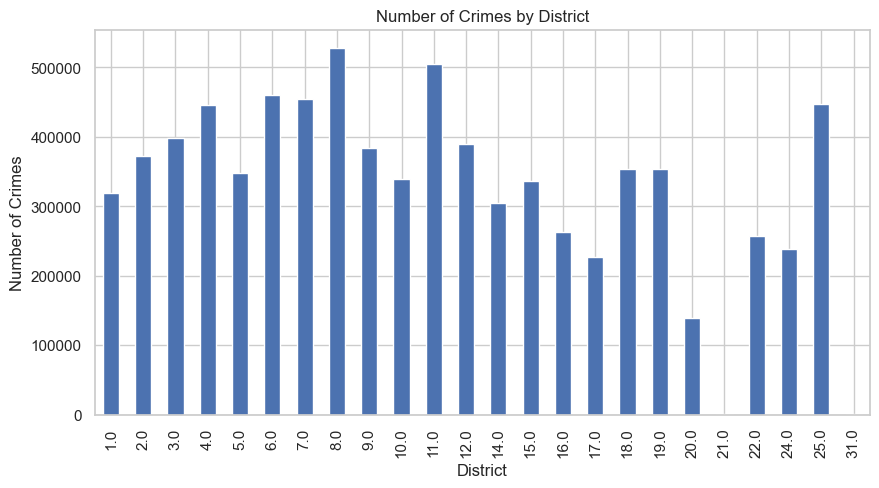

In [47]:
# plot Number of Crimes by District
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('District')['ID'].size().plot(kind='bar')
plt.title('Number of Crimes by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

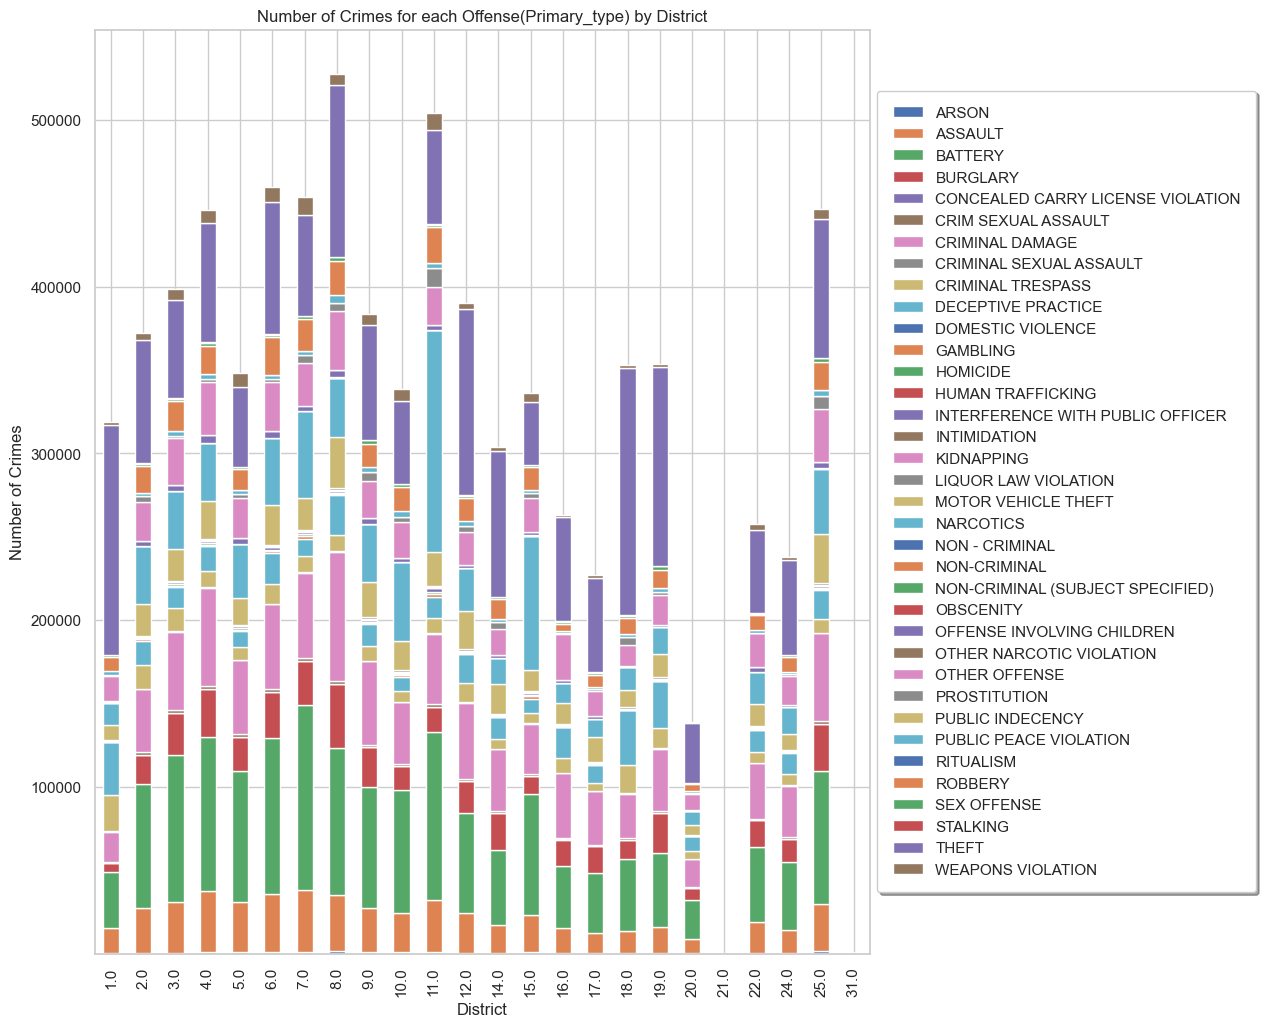

In [48]:
# plot Number of Crimes for each Primary Type by District
df.groupby(['District','Primary_type'])['ID'].size().unstack().plot(kind='bar', figsize=(10,12), stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, borderpad=1)
plt.title('Number of Crimes for each Offense(Primary_type) by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')

In [49]:
# creating a new dataframe to store year, Primary Type, and number of crimes
crimedf = pd.DataFrame(df.groupby(['Year','Primary_type']).size().sort_values(ascending=False).rename('COUNT').reset_index())


In [50]:
# display the dataframe
crimedf.head()

Year Primary_type  COUNT
0  2001        THEFT  99277
1  2003        THEFT  98876
2  2002        THEFT  98332
3  2004        THEFT  95463
4  2002      BATTERY  94153

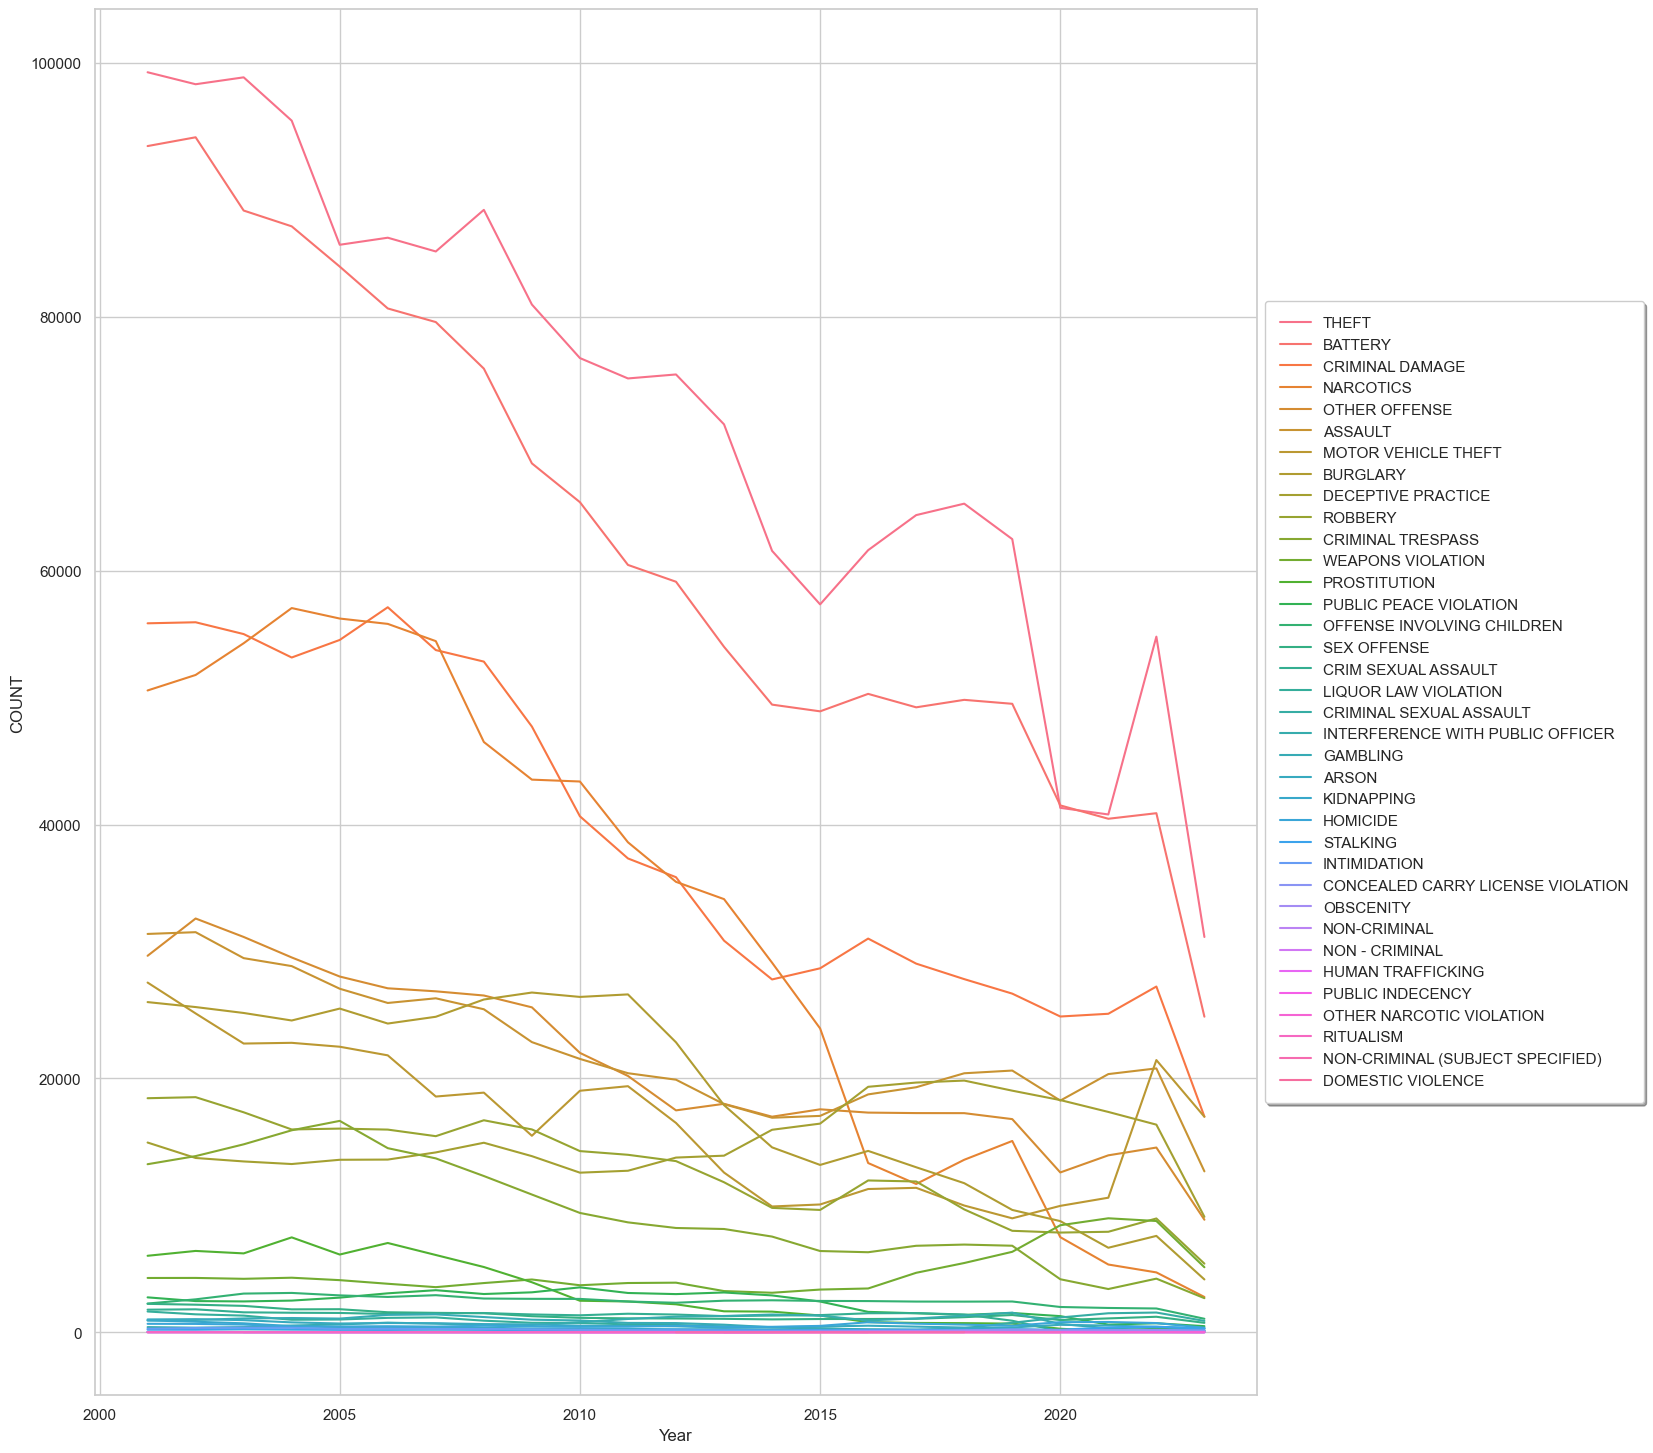

In [51]:
# plotting the crime trend over YEARs
plt.figure(figsize=(15, 18))
ax = sns.lineplot(x='Year',
                  y='COUNT',
                  hue='Primary_type',
                  data=crimedf).legend(loc='center left',
                                           bbox_to_anchor=(1, 0.5),
                                           fancybox=True,
                                           shadow=True,
                                           borderpad=1)

In [52]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary_type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Time', 'DAYOFWEEK', 'MONTH'],
      dtype='object')

In [53]:
### create a new dataframe to store Latitude, Longitude and COUNT

crime_loc_df = pd.DataFrame(df.groupby(['Latitude', 'Longitude']).size().sort_values(ascending=False).rename('COUNT').reset_index())


In [54]:
crime_loc_df.head()


Latitude  Longitude  COUNT
0  41.976290 -87.905227  14332
1  41.754593 -87.741529  10335
2  41.883500 -87.627877   8505
3  41.897895 -87.624097   4878
4  41.909664 -87.742729   3507

In [55]:
crime_loc_df['COUNT'].sum()


7770175

In [56]:
# Drop a row by condition
crime_loc_filter_df = crime_loc_df[crime_loc_df.Latitude != -1]

In [57]:
# Get the locations which have number of crimes >= 100
crime_max_loc_df = crime_loc_filter_df[crime_loc_filter_df.COUNT >= 100]

In [58]:
# import relevant libraries
import plotly.graph_objs as go
import plotly as py
# must enable in order to use plotly off-line
py.offline.init_notebook_mode()

In [59]:
# scatter plot to plot Latitude and Longitude according to the crime count
scatter = go.Scatter(x=crime_max_loc_df['Longitude'],
                     y=crime_max_loc_df['Latitude'],
                     marker={'color': crime_max_loc_df['COUNT'],
                             'showscale': True},
                     text=crime_max_loc_df['COUNT'],
                     mode='markers')
fig = go.FigureWidget(data=[scatter],
                      layout={'xaxis': {'title': 'longitude'},
                              'yaxis': {'title': 'latitude'}})
fig = fig.update_layout(
            autosize=False,
            width=1000,
            height=1000
      )
 #fig.show()

In [60]:
# Plot and embed in the notebook
py.offline.iplot(fig, filename='scatterplot_locations')
fig.show()

<AxesSubplot:>

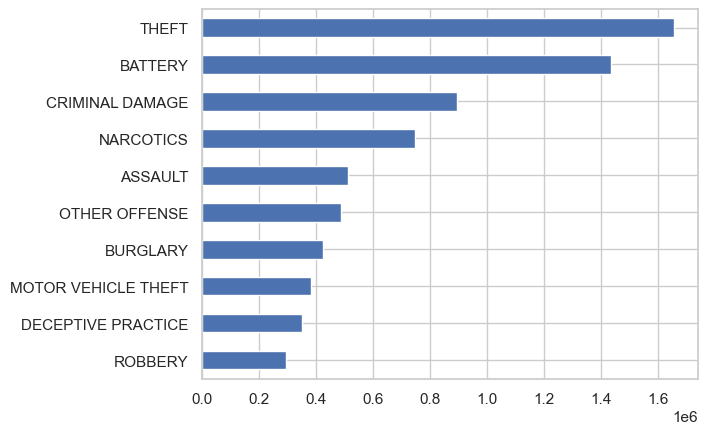

In [61]:
# visualize Primary_type vs number of incidents
df.Primary_type.value_counts().iloc[:10].sort_values().plot(kind="barh")

In [62]:
crime_count_by_type = pd.DataFrame(df.groupby('Primary_type').size().sort_values(ascending=False).rename('COUNT').reset_index())


In [63]:
# display the dataframe
crime_count_by_type.head(10)

Primary_type    COUNT
0                THEFT  1658116
1              BATTERY  1435731
2      CRIMINAL DAMAGE   895904
3            NARCOTICS   748930
4              ASSAULT   513778
5        OTHER OFFENSE   487894
6             BURGLARY   426407
7  MOTOR VEHICLE THEFT   383562
8   DECEPTIVE PRACTICE   349927
9              ROBBERY   295081

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'BATTERY'),
 Text(2, 0, 'CRIMINAL DAMAGE'),
 Text(3, 0, 'NARCOTICS'),
 Text(4, 0, 'ASSAULT'),
 Text(5, 0, 'OTHER OFFENSE'),
 Text(6, 0, 'BURGLARY'),
 Text(7, 0, 'MOTOR VEHICLE THEFT'),
 Text(8, 0, 'DECEPTIVE PRACTICE'),
 Text(9, 0, 'ROBBERY'),
 Text(10, 0, 'CRIMINAL TRESPASS'),
 Text(11, 0, 'WEAPONS VIOLATION'),
 Text(12, 0, 'PROSTITUTION'),
 Text(13, 0, 'OFFENSE INVOLVING CHILDREN'),
 Text(14, 0, 'PUBLIC PEACE VIOLATION'),
 Text(15, 0, 'SEX OFFENSE'),
 Text(16, 0, 'CRIM SEXUAL ASSAULT'),
 Text(17, 0, 'INTERFERENCE WITH PUBLIC OFFICER'),
 Text(18, 0, 'LIQUOR LAW VIOLATION'),
 Text(19, 0, 'GAMBLING'),
 Text(20, 0, 'ARSON'),
 Text(21, 0, 'HOMICIDE'),
 Text(22, 0, 'KIDNAPPING'),
 Text(23, 0, 'CRIMINAL SEXUAL ASSAULT'),
 Text(24, 0, 'STALKING'),
 Text(25, 0, 'INTIMIDATION'),
 Text(26, 0, 'CONCEALED CARRY LICENSE VIOLATION'),
 Text(27, 0, 'OBSCENITY'),
 Text(28, 0, 'PUBLIC INDECENCY'),
 Text(29, 0, 'NON-CRIMINAL'),
 Text(30, 0, 'OTHER NARCOTIC VIOLATION'),


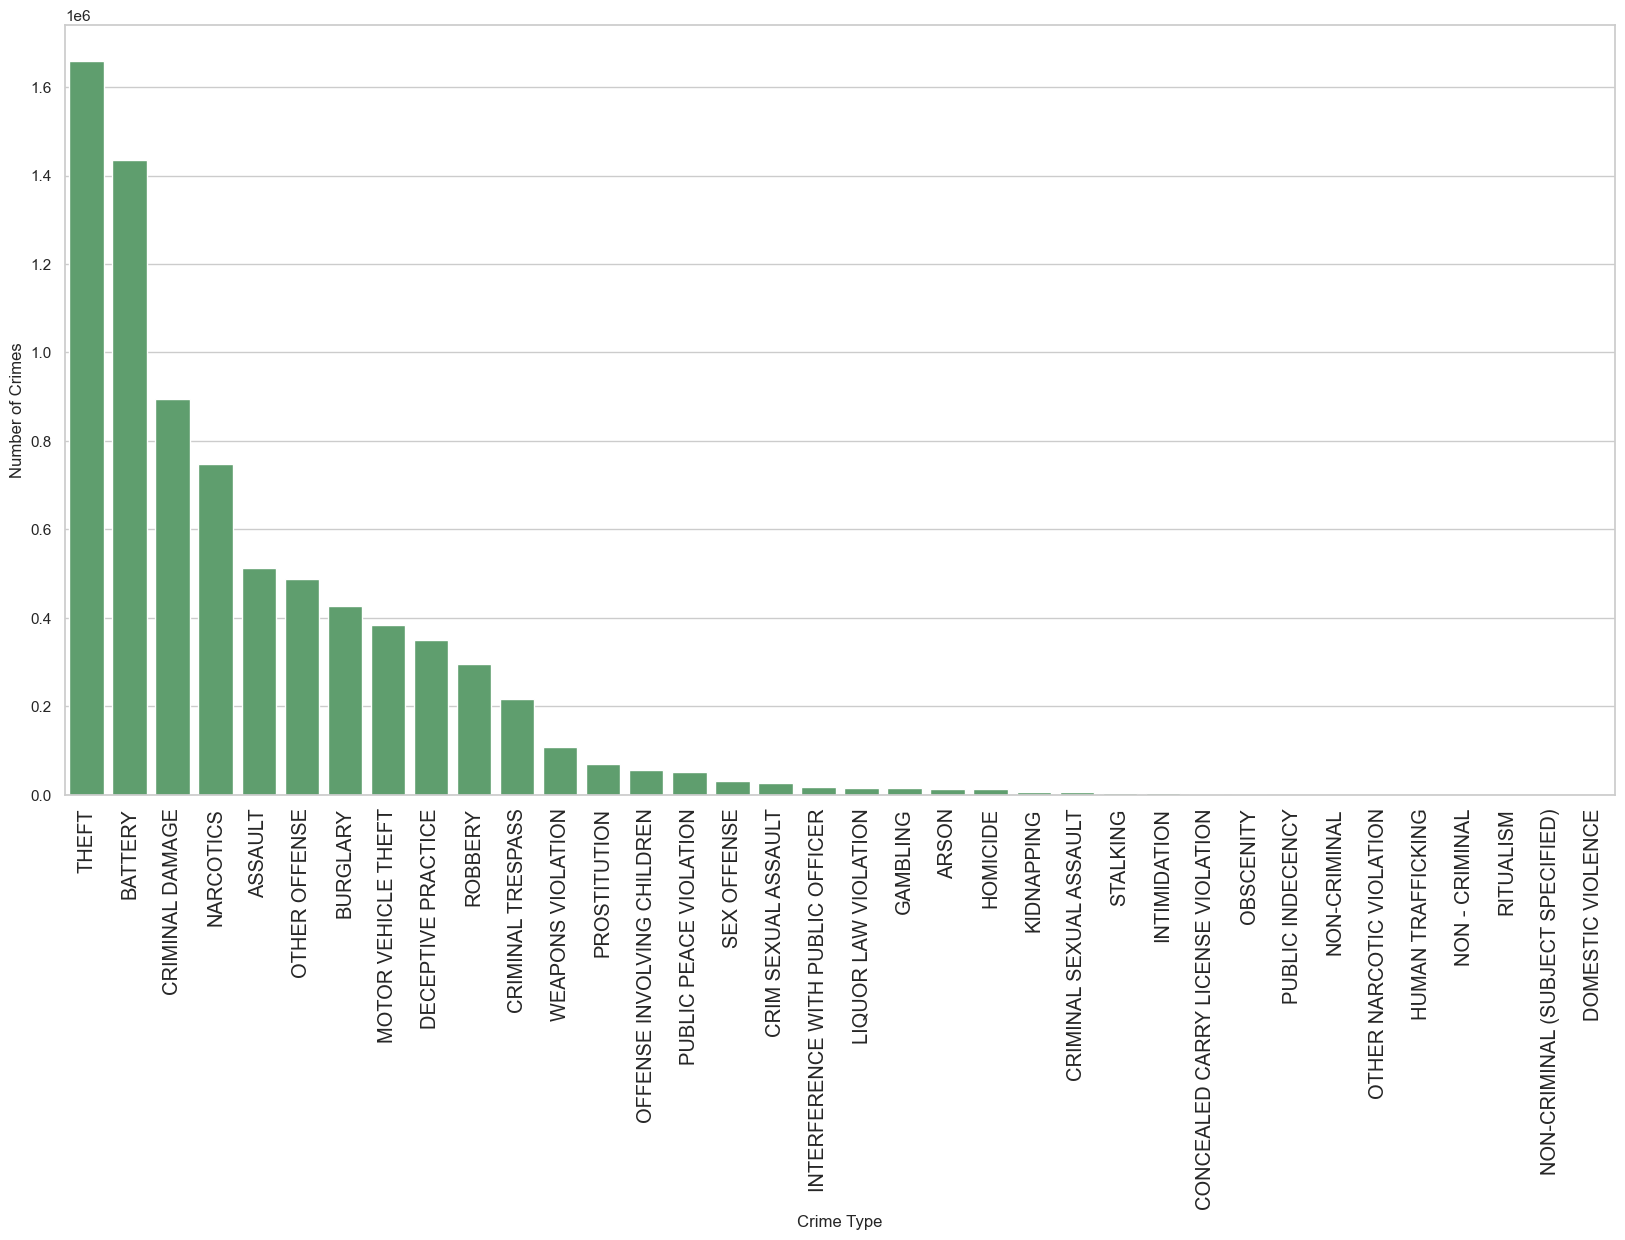

In [64]:
# create the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

# plot the graph of number of crimes vs. Primary_type(type of crimes)
# all types of Primary_type types will be plotted
barplot_alltypes = sns.barplot(x="Primary_type", y="COUNT", data=crime_count_by_type, color="g")
# set the axis labels
ax.set(ylabel="Number of Crimes", xlabel="Crime Type")
# rotate xticklabels
barplot_alltypes.set_xticklabels(barplot_alltypes.get_xticklabels(),
                        rotation=90,
                        fontweight='light',
                        fontsize='large'
                        )

In [65]:
crimedf = df

In [66]:
# split Date to give only date and no time
df['DATE'] = [d.date() for d in crimedf['Date']]
df['YEAR'] = crimedf.Date.dt.year

In [67]:
# Extract the Year-Month combination from the 'Dates' using 'dt.to_period' function.
# Where 'D', 'M' and 'Y' are the inputs.
# Here, 'DATE' should be in the datetime format.
crimedf['YEAR_MONTH'] = pd.to_datetime(df['Date']).dt.to_period('M')

In [68]:
# display first five fields
crimedf.head()

ID Case Number                Date                  Block  IUCR  \
0  11646166    JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE  0810   
1  11645836    JC212333 2016-05-01 00:25:00    055XX S ROCKWELL ST  1153   
2  11243268    JB167760 2017-01-01 00:01:00       047XX N CLARK ST  1562   
3   1896258     G749215 2001-12-15 02:00:00       011XX N STATE ST  0460   
4  11645527    JC212744 2015-02-02 10:00:00     069XX W ARCHER AVE  1153   

         Primary_type                          Description  \
0               THEFT                            OVER $500   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2         SEX OFFENSE            AGG CRIMINAL SEXUAL ABUSE   
3             BATTERY                               SIMPLE   
4  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...              Updated On  \
0            RESIDENCE   False      True  ...  04/06/2019 04:04:43 PM   
1                  NaN   False     False  ...  04/06/2019 04:04:43 PM   
2            APARTMENT   False     False  ...  09/13/2018 03:56:52 PM   
3               STREET   False     False  ...  08/17/2015 03:03:40 PM   
4                OTHER   False     False  ...  04/06/2019 04:04:43 PM   

   Latitude  Longitude  Location      Time  DAYOFWEEK      MONTH        DATE  \
0       NaN        NaN       NaN  00:01:00   Saturday  September  2018-09-01   
1       NaN        NaN       NaN  00:25:00     Sunday        May  2016-05-01   
2       NaN        NaN       NaN  00:01:00     Sunday    January  2017-01-01   
3       NaN        NaN       NaN  02:00:00   Saturday   December  2001-12-15   
4       NaN        NaN       NaN  10:00:00     Monday   February  2015-02-02   

   YEAR  YEAR_MONTH  
0  2018     2018-09  
1  2016     2016-05  
2  2017     2017-01  
3  2001     2001-12  
4  2015     2015-02  

[5 rows x 28 columns]

In [69]:
# assign the cleaned dataframe to crimedf
new_crimedf = crimedf

In [70]:
# get the number of crimes for each day
crime_count_by_date = pd.DataFrame(df.groupby('DATE').size().sort_values(ascending=False).rename('COUNT').reset_index())


In [71]:
# display the dataframe
crime_count_by_date.head()

DATE  COUNT
0  2003-01-01   2033
1  2005-01-01   1978
2  2007-01-01   1963
3  2006-01-01   1919
4  2020-05-31   1899

In [72]:
# get the number of crimes for each year
crime_count_by_year = pd.DataFrame(crimedf.groupby('YEAR').size().rename('COUNT').reset_index())

[Text(0, 0, '2001'),
 Text(1, 0, '2002'),
 Text(2, 0, '2003'),
 Text(3, 0, '2004'),
 Text(4, 0, '2005'),
 Text(5, 0, '2006'),
 Text(6, 0, '2007'),
 Text(7, 0, '2008'),
 Text(8, 0, '2009'),
 Text(9, 0, '2010'),
 Text(10, 0, '2011'),
 Text(11, 0, '2012'),
 Text(12, 0, '2013'),
 Text(13, 0, '2014'),
 Text(14, 0, '2015'),
 Text(15, 0, '2016'),
 Text(16, 0, '2017'),
 Text(17, 0, '2018'),
 Text(18, 0, '2019'),
 Text(19, 0, '2020'),
 Text(20, 0, '2021'),
 Text(21, 0, '2022'),
 Text(22, 0, '2023')]

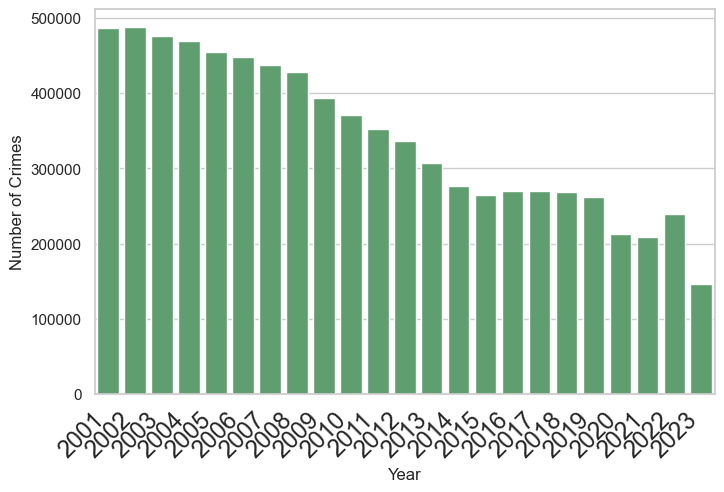

In [73]:
# create the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 5))

# plot the graph of number of crimes vs. year
barplot3 = sns.barplot(x="YEAR", y="COUNT", data=crime_count_by_year, color="g")
# set the axis labels
ax.set(ylabel="Number of Crimes", xlabel="Year")
# rotate xticklabels
barplot3.set_xticklabels(barplot3.get_xticklabels(),
                        rotation=45,
                        horizontalalignment='right',
                        fontweight='light',
                        fontsize='x-large'
                        )

In [74]:
# get the number of crimes for each day without sorting
new_crime_count_by_date = pd.DataFrame(df.groupby('DATE').size().rename('COUNT').reset_index())

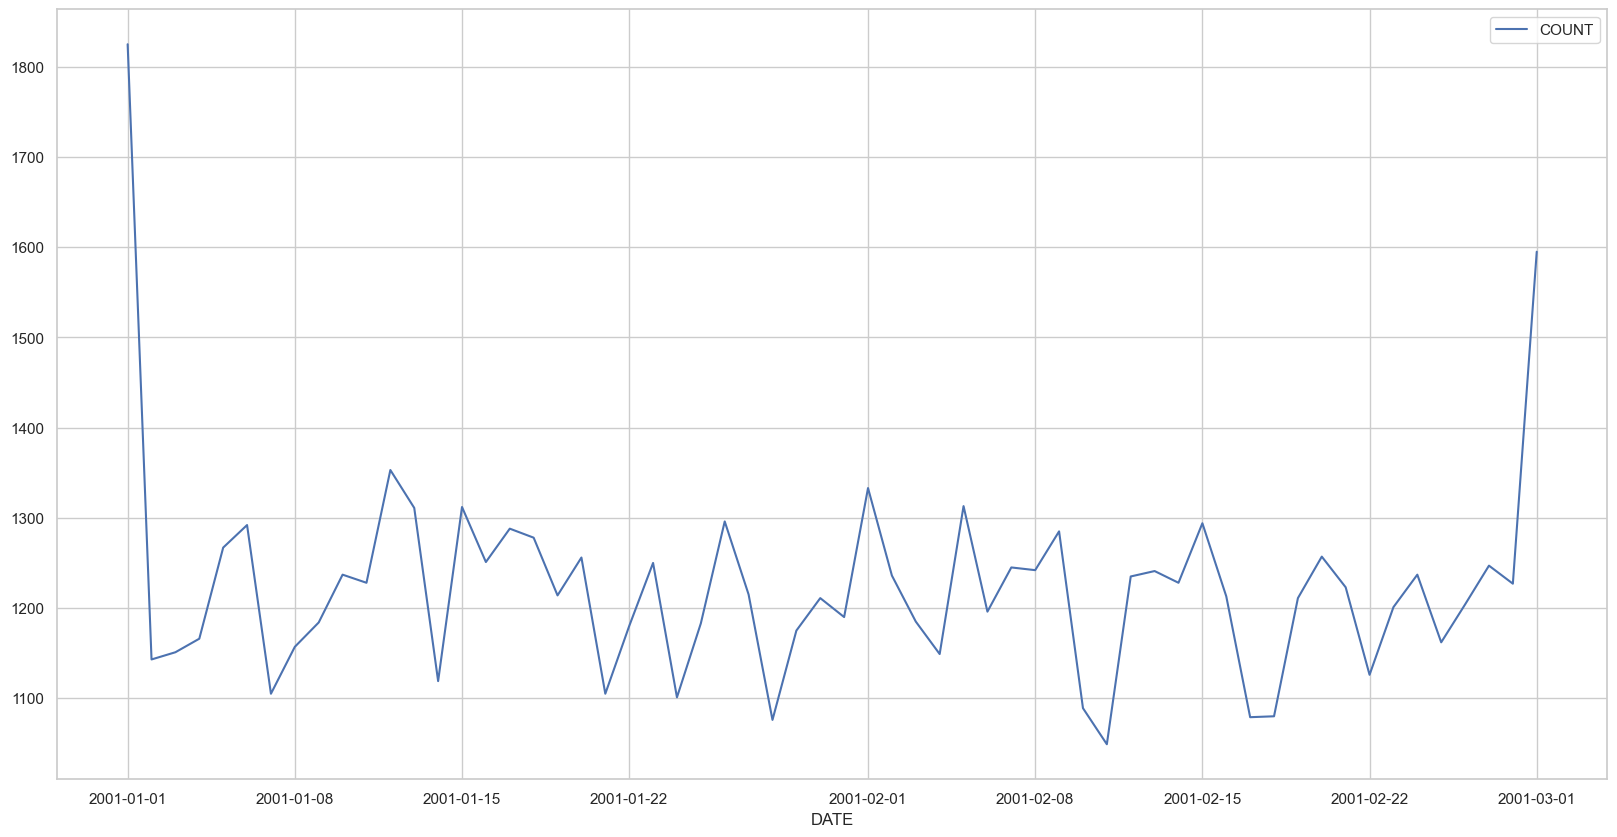

In [75]:
# plot the line graph in order to observe the pattern
# Number of crimes for first 60 days will be plotted
lineplot1 = new_crime_count_by_date.iloc[:60, :].plot.line(x="DATE", y="COUNT", figsize=(20, 10))

In [76]:
# get the number of crimes for each year
crime_count_by_month = pd.DataFrame(crimedf.groupby('MONTH').size().rename('COUNT').reset_index())

In [77]:
### Grouping up by BLOCK
blocktype=df.groupby(['Block'])

In [78]:
df.groupby('Block').aggregate({'Primary_type': lambda x: x.nunique(), 'YEAR': lambda x: x.nunique()})

Primary_type  YEAR
Block                                    
0000X E 100 PL                    9     2
0000X E 100 ST                   11     2
0000X E 100TH PL                 21    22
0000X E 100TH ST                 22    22
0000X E 101 PL                    5     2
...                             ...   ...
139XX S ATLANTIC                  1     1
145XX S MINERVA                   1     1
173XX  LORENZ                     1     1
175XX S SANDALWOOD DR             1     1
XX  UNKNOWN                       2     1

[63145 rows x 2 columns]

In [79]:
### Checking which block has the most number of crimes
crime_count_by_blocks = pd.DataFrame(df.groupby('Block').size().sort_values(ascending=False).rename('COUNT').reset_index())
crime_count_by_blocks.head()


Block  COUNT
0      100XX W OHARE ST  16548
1      001XX N STATE ST  15481
2    076XX S CICERO AVE  10145
3  008XX N MICHIGAN AVE   9447
4      0000X N STATE ST   9132

In [80]:
### Looking at the arrest info
crimetype['Arrest'].value_counts().nlargest(10)

Primary_type         Arrest
THEFT                False     1473745
BATTERY              False     1120721
CRIMINAL DAMAGE      False      836065
NARCOTICS            True       744320
ASSAULT              False      405321
OTHER OFFENSE        False      402264
BURGLARY             False      402039
MOTOR VEHICLE THEFT  False      352445
BATTERY              True       315010
DECEPTIVE PRACTICE   False      303405
Name: Arrest, dtype: int64

In [81]:
### looking at the number of arrests actually happened

In [139]:
### Changing bool to string 
df['Arrest'] = df['Arrest'].replace({True: 'True', False: 'False'})

In [145]:
### Crimes where the arrest didn't occure
not_arrested=crime_grp['Arrest'].apply(lambda x : x.str.contains('False').sum()).nlargest(10)

In [146]:
### Crimes where the arrests occured
arrested=crime_grp['Arrest'].apply(lambda x : x.str.contains('True').sum()).nlargest(10)

In [185]:
### finding the percentage of arrests for each crime
df3 = pd.concat([crime_type,arrested,not_arrested], axis='columns', sort=False)

In [186]:
df3.head(3)

Primary_type     Arrest    Arrest
THEFT                 1658116  1473745.0  184371.0
BATTERY               1435731  1120721.0  315010.0
CRIMINAL DAMAGE        895904   836065.0   59839.0

In [187]:
# We have a problem and we need to update this column: The DF has duplicated names
# Checking once again which all columns have the same name
[item for item, count in collections.Counter(df3.columns).items() if count > 1]

['Arrest']

In [188]:
# Changing the name of duplicate columns names
df3.columns.values[0] ='Total_cases'
df3.columns.values[1] ='Not_Arrested'
df3.columns.values[2] ='Arrested'


In [189]:
df3.head(3)

Total_cases   Arrested  Not_Arrested
THEFT                1658116  1473745.0      184371.0
BATTERY              1435731  1120721.0      315010.0
CRIMINAL DAMAGE       895904   836065.0       59839.0

In [190]:
df3['percentage'] = (df3['Arrested']/df3['Total_cases']) * 100

In [183]:
df3.head(3)

Total_cases   Arrested  Not_Arrested  percentage
THEFT                1658116  1473745.0      184371.0   88.880694
BATTERY              1435731  1120721.0      315010.0   78.059260
CRIMINAL DAMAGE       895904   836065.0       59839.0   93.320825